In [1]:
# 6.1.4

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime


In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [12]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)


In [13]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


606

In [14]:
# 6.2.6

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


In [15]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [ ]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for our logging purposes.
    if (i % 50 -- 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# DO NOT RUN

In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 2 | alyangula
Processing Record 2 of Set 2 | ushuaia
Processing Record 3 of Set 2 | sibolga
Processing Record 4 of Set 2 | ribeira grande
Processing Record 5 of Set 2 | comodoro rivadavia
Processing Record 6 of Set 2 | saldanha
Processing Record 7 of Set 2 | busselton
Processing Record 8 of Set 2 | hobart
Processing Record 9 of Set 2 | bluff
Processing Record 10 of Set 2 | cape town
Processing Record 11 of Set 2 | puerto escondido
Processing Record 12 of Set 2 | albany
Processing Record 13 of Set 2 | cabo san lucas
Processing Record 14 of Set 2 | sept-iles
Processing Record 15 of Set 2 | paamiut
Processing Record 16 of Set 2 | puerto ayora
Processing Record 17 of Set 2 | lebu
Processing Record 18 of Set 2 | mataura
Processing Record 19 of Set 2 | gallup
Processing Record 20 of Set 2 | tabory
Processing Record 21 of Set 2 | atuona
Processing Record 22 of Set 2 | illoqqortoormiut
City not found. Skipping...
Processing Record 23 of Set 2 | port keats
Processing 

Processing Record 41 of Set 5 | sao filipe
Processing Record 42 of Set 5 | esperance
Processing Record 43 of Set 5 | nishihara
Processing Record 44 of Set 5 | port elizabeth
Processing Record 45 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 5 | belturbet
Processing Record 47 of Set 5 | andevoranto
City not found. Skipping...
Processing Record 48 of Set 5 | yerbogachen
Processing Record 49 of Set 5 | qinzhou
Processing Record 50 of Set 5 | jinchengjiang
City not found. Skipping...
Processing Record 1 of Set 6 | upernavik
Processing Record 2 of Set 6 | saint george
Processing Record 3 of Set 6 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 6 | lolua
City not found. Skipping...
Processing Record 5 of Set 6 | avera
Processing Record 6 of Set 6 | grand centre
City not found. Skipping...
Processing Record 7 of Set 6 | marcona
City not found. Skipping...
Processing Record 8 of Set 6 | tual
Processing Record 9 of Set 6 | harper
Processi

Processing Record 26 of Set 9 | ushtobe
Processing Record 27 of Set 9 | praia da vitoria
Processing Record 28 of Set 9 | alta floresta
Processing Record 29 of Set 9 | jardim
Processing Record 30 of Set 9 | dori
Processing Record 31 of Set 9 | mahajanga
Processing Record 32 of Set 9 | mount gambier
Processing Record 33 of Set 9 | kuznechnoye
Processing Record 34 of Set 9 | lagoa
Processing Record 35 of Set 9 | safaga
Processing Record 36 of Set 9 | novoagansk
Processing Record 37 of Set 9 | hamilton
Processing Record 38 of Set 9 | kuching
Processing Record 39 of Set 9 | yelbarga
Processing Record 40 of Set 9 | boden
Processing Record 41 of Set 9 | gigmoto
Processing Record 42 of Set 9 | banjar
Processing Record 43 of Set 9 | mayo
Processing Record 44 of Set 9 | sisimiut
Processing Record 45 of Set 9 | camacha
Processing Record 46 of Set 9 | mpanda
Processing Record 47 of Set 9 | impfondo
Processing Record 48 of Set 9 | banes
Processing Record 49 of Set 9 | nyurba
Processing Record 50 of

Processing Record 15 of Set 13 | garden city
Processing Record 16 of Set 13 | rabo de peixe
Processing Record 17 of Set 13 | lasa
Processing Record 18 of Set 13 | bolu
Processing Record 19 of Set 13 | canutama
Processing Record 20 of Set 13 | acacoyagua
Processing Record 21 of Set 13 | nioro
Processing Record 22 of Set 13 | doctor pedro p. pena
City not found. Skipping...
Processing Record 23 of Set 13 | pangoa
Processing Record 24 of Set 13 | san carlos de bariloche
Processing Record 25 of Set 13 | coquimbo
Processing Record 26 of Set 13 | antofagasta
Processing Record 27 of Set 13 | padilla
Processing Record 28 of Set 13 | sudak
Processing Record 29 of Set 13 | oistins
Processing Record 30 of Set 13 | toliary
City not found. Skipping...
Processing Record 31 of Set 13 | los llanos de aridane
Processing Record 32 of Set 13 | coari
Processing Record 33 of Set 13 | bowmore
Processing Record 34 of Set 13 | paita
Processing Record 35 of Set 13 | sioux lookout
Processing Record 36 of Set 13

In [ ]:
# 6.2.7

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alyangula,AU,2022-04-27 00:45:10,-13.8483,136.4192,85.87,66,83,1.14
1,Ushuaia,AR,2022-04-27 00:45:11,-54.8000,-68.3000,38.86,81,75,11.50
2,Sibolga,ID,2022-04-27 00:45:11,1.7427,98.7792,81.27,74,100,1.45
3,Ribeira Grande,PT,2022-04-27 00:41:11,38.5167,-28.7000,63.21,94,89,24.34
4,Comodoro Rivadavia,AR,2022-04-27 00:45:12,-45.8667,-67.5000,44.46,53,0,8.05


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [2]:
# Import the cities CSV (Run top cell first)

# File to load
city_data_to_load = "weather_data/cities.csv"

# Read the city data
city_data_df = pd.read_csv(city_data_to_load)


In [3]:
# 6.3.1

# Extract relevant fields from the DataFrame. for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]


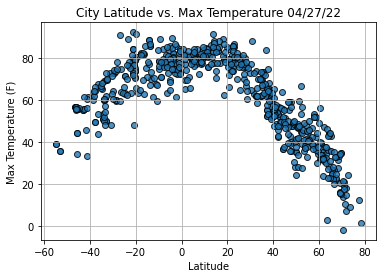

In [4]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


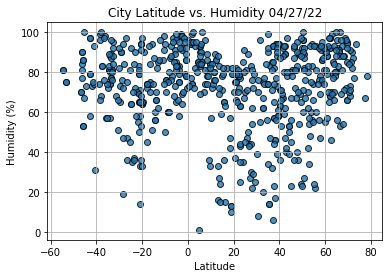

In [5]:
# 6.3.2

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


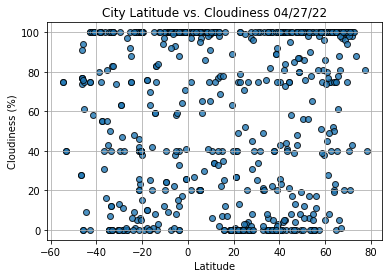

In [10]:
# 6.3.3

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


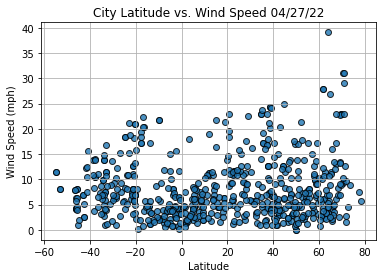

In [11]:
# 6.3.4

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


In [20]:
# 6.4.2

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err)=linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values=x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [21]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]


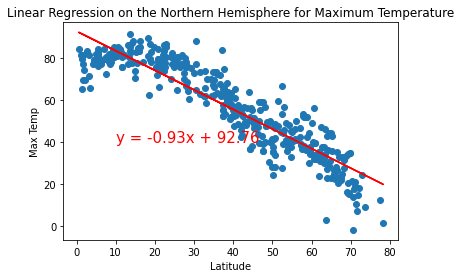

In [26]:
# Linear regression on the Northern Hemisphere.
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


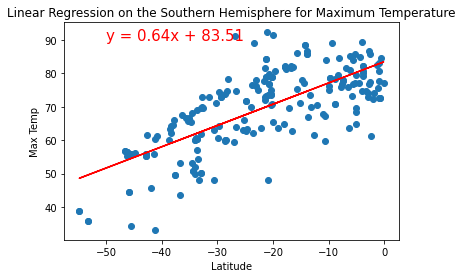

In [27]:
# Linear regression on the Southern Hemisphere.
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))
